**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# We import all the packages we are using for further tasks:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
import sympy as sm
import matplotlib.pyplot as plt
from types import SimpleNamespace
from IPython.display import display, Math

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

This exercise has been completed by the use of AI tools. Specifically, ChatGPT has partially helped with forming python-code and have assisted with guided text for each code snippet.

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

We do the following:

1. **We calculate the Optimal Labor for Each Firm**:
   $$
   \ell_j^*(w, p_j) = \left( \frac{p_j A \gamma}{w} \right)^{\frac{1}{1-\gamma}}
   $$
   This represents the amount of labor each firm \( j \) hires to maximize its profit.

2. **We calculate the Optimal Output for Each Firm**:
   $$
   y_j^*(w, p_j) = A \left( \ell_j^*(w, p_j) \right)^\gamma
   $$
   This represents the output each firm \( j \) produces using the optimal labor.

3. **We calculate the Implied Profits for Each Firm**:
   $$
   \pi_j^*(w, p_j) = \frac{1-\gamma}{\gamma} w \left( \frac{p_j A \gamma}{w} \right)^{\frac{1}{1-\gamma}}
   $$
   This represents the profits each firm \( j \) earns given the optimal labor and output.

4. **We calculate the Optimal Consumption for the Consumer**:
   $$
   \begin{align*}
   c_1(\ell) &= \alpha \frac{w \ell + T + \pi_1^*(w, p_1) + \pi_2^*(w, p_2)}{p_1} \\
   c_2(\ell) &= (1-\alpha) \frac{w \ell + T + \pi_1^*(w, p_1) + \pi_2^*(w, p_2)}{p_2 + \tau}
   \end{align*}
   $$
   These represent the consumption of goods 1 and 2 by the consumer given the labor supply \( \ell \).

5. **We find the Optimal Labor Supply for the Consumer**:
   $$
   \ell^* = \underset{\ell}{\arg\max} \log \left( (c_1(\ell))^\alpha \cdot (c_2(\ell))^{1-\alpha} \right) - \nu \frac{\ell^{1+\epsilon}}{1+\epsilon}
   $$
   This represents the consumer's optimal labor supply that maximizes her utility.

6. **Lastly we check the Market Clearing Conditions**:
   $$
   \begin{align*}
   \text{Labor Market:} & \quad \ell^* = \ell_1^* + \ell_2^* \\
   \text{Good Market 1:} & \quad c_1^* = y_1^* \\
   \text{Good Market 2:} & \quad c_2^* = y_2^*
   \end{align*}
   $$
   These conditions ensure that the labor and goods markets clear.


In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
# We set w to numeraire
w = 1.0

# We define functions for optimal firm behavior
def ell_star(pj, A, gamma, w):
    return (pj * A * gamma / w) ** (1 / (1 - gamma))

def y_star(pj, A, gamma, w):
    ell = ell_star(pj, A, gamma, w)
    return A * ell ** gamma

def pi_star(pj, A, gamma, w):
    ell = ell_star(pj, A, gamma, w)
    return (1 - gamma) / gamma * w * ell

# We define functions for optimal behavior
def c1(ell, w, T, pi1, pi2, p1, alpha):
    return alpha * (w * ell + T + pi1 + pi2) / p1

def c2(ell, w, T, pi1, pi2, p2, tau, alpha):
    return (1 - alpha) * (w * ell + T + pi1 + pi2) / (p2 + tau)

# Finally, we define the utility function that has to be maximized
def utility(ell, w, T, pi1, pi2, p1, p2, tau, alpha, nu, epsilon):
    c1_val = c1(ell, w, T, pi1, pi2, p1, alpha)
    c2_val = c2(ell, w, T, pi1, pi2, p2, tau, alpha)
    return np.log(c1_val ** alpha * c2_val ** (1 - alpha)) - nu * (ell ** (1 + epsilon)) / (1 + epsilon)

# Now we iterate over p1 and p2 values
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# We make a for-loop where we for each unique value of p1 and p2 find the market clearing conditions
for p1 in p1_values:
    for p2 in p2_values:
        # We calculate firm-specific variables
        ell1_star = ell_star(p1, par.A, par.gamma, w)
        y1_star = y_star(p1, par.A, par.gamma, w)
        pi1_star = pi_star(p1, par.A, par.gamma, w)
        
        ell2_star = ell_star(p2, par.A, par.gamma, w)
        y2_star = y_star(p2, par.A, par.gamma, w)
        pi2_star = pi_star(p2, par.A, par.gamma, w)
        
        # We solve for optimal labor supply
        result = minimize(lambda ell: -utility(ell, w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, par.nu, par.epsilon), 1.0)
        ell_star_opt = result.x[0]
        
        # We now calculate optimal behavior
        c1_star = c1(ell_star_opt, w, par.T, pi1_star, pi2_star, p1, par.alpha)
        c2_star = c2(ell_star_opt, w, par.T, pi1_star, pi2_star, p2, par.tau, par.alpha)
        
        # Lastly we check market clearing conditions with default tolerance
        labor_market_clearing = np.isclose(ell_star_opt, ell1_star + ell2_star)
        goods_market_1_clearing = np.isclose(c1_star, y1_star)
        goods_market_2_clearing = np.isclose(c2_star, y2_star)
        
        # We print the results
        print(f'p1={p1:.2f}, p2={p2:.2f}, Labor Market Clearing: {labor_market_clearing}, '
              f'Goods Market 1 Clearing: {goods_market_1_clearing}, Goods Market 2 Clearing: {goods_market_2_clearing}')


p1=0.10, p2=0.10, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=0.31, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=0.52, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=0.73, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=0.94, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=1.16, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=1.37, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=1.58, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p1=0.10, p2=1.79, Labor Market Clearing: False, Goods Market 1 Clearing: False, Goods Market 2 Clearing: False
p

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

We do the following:
1. We **define** the `market_clearing_discrepancy` function to **calculate** discrepancies for market clearing.
2. We **calculate** firm-specific variables $\ell_1^*, y_1^*, \pi_1^*$ and $\ell_2^*, y_2^*, \pi_2^*$ using the provided functions.
3. We **solve** for optimal labor supply $\ell^*$ by minimizing the negative utility function and **calculate** optimal consumption $c_1^*$ and $c_2^*$.
4. We **set** an initial guess for prices and **find** the equilibrium prices by minimizing the `market_clearing_discrepancy` function.


In [4]:
# We start out by defining our discrepancy function to minimize for market clearing
def market_clearing_discrepancy(prices, par, w):
    p1, p2 = prices
    
    # We then calculate firm-specific variables
    y1_star = y_star(p1, par.A, par.gamma, w)
    pi1_star = pi_star(p1, par.A, par.gamma, w)
    
    y2_star = y_star(p2, par.A, par.gamma, w)
    pi2_star = pi_star(p2, par.A, par.gamma, w)
    
    # We now solve for optimal labor supply
    result = minimize(lambda ell: -utility(ell, w, par.T, pi1_star, pi2_star, p1, p2, par.tau, par.alpha, par.nu, par.epsilon), 1.0)
    ell_star_opt = result.x[0]
    
    # Now we calculate optimal consumption
    c1_star = c1(ell_star_opt, w, par.T, pi1_star, pi2_star, p1, par.alpha)
    c2_star = c2(ell_star_opt, w, par.T, pi1_star, pi2_star, p2, par.tau, par.alpha)
    
    # And discrepancies for market clearing
    discrepancy_c1 = c1_star - y1_star
    discrepancy_c2 = c2_star - y2_star
    
    # Then we sum over the squared discrepancies
    return discrepancy_c1**2 + discrepancy_c2**2

# Makes our initial guess for p1 and p2
initial_guess = [1.0, 1.0]

# Lastly we use optimizer to find the equilibrium prices
result = minimize(market_clearing_discrepancy, initial_guess, args=(par, w), bounds=[(0.1, 10), (0.1, 10)])
optimal_p1, optimal_p2 = result.x

print(f'Optimal p1: {optimal_p1:.4f}, Optimal p2: {optimal_p2:.4f}')
print()


Optimal p1: 0.9760, Optimal p2: 1.4908



Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

We do the following:
1. We **define** our symbols for consumption, parameters, and prices.
2. We **set up** and **solve** the given equation for $c_2$.
3. We **define** the equation for $c_1$ using the solution for $c_2$ and **simplify** it.
4. We **print** the solutions for $c_2$ and $c_1$.


In [5]:
# We define our symbols
c_2, alpha, w, l, tau, pi1, pi2, p2, p1 = sm.symbols('c_2 alpha w l tau pi1 pi2 p2 p1')

# We have the given equation for c_2
equation_c2 = sm.Eq(c_2, (1 - alpha) * (w * l + tau * c_2 + pi1 + pi2) / (p2 + tau))

# Now we solve for c_2
c2_solution = sm.solve(equation_c2, c_2)[0]

# We then define the equation for c_1
c_1 = sm.symbols('c_1')
T = tau * c2_solution
equation_c1 = sm.Eq(c_1, alpha * (w * l + T + pi1 + pi2) / p1)

# And solve for c_1
c1_solution = sm.simplify(equation_c1.rhs)

# Then we print the solutions
print("Solution for c_2:")
sm.pretty_print(c2_solution)

print("\nSolution for c_1:")
sm.pretty_print(c1_solution)

Solution for c_2:
-α⋅l⋅w - α⋅π₁ - α⋅π₂ + l⋅w + π₁ + π₂
────────────────────────────────────
              α⋅τ + p₂              

Solution for c_1:
α⋅(l⋅p₂⋅w + l⋅τ⋅w + p₂⋅π₁ + p₂⋅π₂ + π₁⋅τ + π₂⋅τ)
────────────────────────────────────────────────
                 p₁⋅(α⋅τ + p₂)                  


1. We **define** parameters and optimal prices, then **calculate** optimal values for firms using the given functions.
2. We **define** functions for optimal consumption given labor supply and the utility function.
3. We **calculate** the optimal labor supply by minimizing the negative utility function and **define** the social welfare function (SWF).
4. We **optimize** the SWF with respect to $\tau$ and **calculate** the optimal values for labor supply, consumption, utility, and social welfare at the optimal $\tau$.


In [19]:
# We define the parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.kappa = 0.1

p1_optimal = 0.9760
p2_optimal = 1.4908
w = 1 

# We plot the functions for optimal firm behavior
def ell_star(pj, A, gamma, w):
    return (pj * A * gamma / w) ** (1 / (1 - gamma))

def y_star(pj, A, gamma, w):
    ell = ell_star(pj, A, gamma, w)
    return A * ell ** gamma

def pi_star(pj, A, gamma, w):
    ell = ell_star(pj, A, gamma, w)
    return (1 - gamma) / gamma * w * ell

# We calculate optimal values for firms
pi1_star = pi_star(p1_optimal, par.A, par.gamma, w)
pi2_star = pi_star(p2_optimal, par.A, par.gamma, w)

# We plot our functions for optimal behavior given labor supply
def c2_Q3(ell, w, pi1_star, pi2_star, p2, tau, alpha):
    return (1 - alpha) * (w * ell + pi1_star + pi2_star) / (p2 + tau * alpha)

def c1_Q3(ell, w, pi1_star, pi2_star, p1, p2, tau, alpha):
    T = tau * c2_Q3(ell, w, pi1_star, pi2_star, p2, tau, alpha)
    return alpha * ((w * ell + T + pi1_star + pi2_star) / p1)

# We then define our utility function
def utility(ell, w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon):
    c2_val = c2_Q3(ell, w, pi1_star, pi2_star, p2, tau, alpha)
    c1_val = c1_Q3(ell, w, pi1_star, pi2_star, p1, p2, tau, alpha)
    return np.log(c1_val ** alpha * c2_val ** (1 - alpha)) - nu * (ell ** (1 + epsilon)) / (1 + epsilon)

# And optimal labor supply
def optimal_ell(w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon):
    res = minimize_scalar(lambda ell: -utility(ell, w, pi1_star, pi2_star, p1_optimal, p2_optimal, tau, alpha, nu, epsilon), bounds=(0, 10), method='bounded')
    return res.x

# And social welfare function
def swf(tau, w, pi1_star, pi2_star, p1, p2, alpha, nu, epsilon, kappa):
    ell_star = optimal_ell(w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon)
    T = tau * c2_Q3(ell_star, w, pi1_star, pi2_star, p2, tau, alpha)
    c1_star = c1_Q3(ell_star, w, pi1_star, pi2_star, p1, p2, tau, alpha)
    c2_star = c2_Q3(ell_star, w, pi1_star, pi2_star, p2, tau, alpha)
    U_star = utility(ell_star, w, pi1_star, pi2_star, p1, p2, tau, alpha, nu, epsilon)
    return U_star - kappa * c2_star

# Lastly we optimize SWF with respect to tau
res_tau = minimize_scalar(lambda tau: -swf(tau, w, pi1_star, pi2_star, p1_optimal, p2_optimal, par.alpha, par.nu, par.epsilon, par.kappa), bounds=(0, 1), method='bounded')
optimal_tau = res_tau.x

# Now we just insert the value and calculates the optimal values for the optimal tau
ell_star_optimal = optimal_ell(w, pi1_star, pi2_star, p1_optimal, p2_optimal, optimal_tau, par.alpha, par.nu, par.epsilon)
T_optimal = optimal_tau * c2_Q3(ell_star_optimal, w, pi1_star, pi2_star, p2_optimal, optimal_tau, par.alpha)
c1_star_optimal = c1_Q3(ell_star_optimal, w, pi1_star, pi2_star, p1_optimal, p2_optimal, optimal_tau, par.alpha)
c2_star_optimal = c2_Q3(ell_star_optimal, w, pi1_star, pi2_star, p2_optimal, optimal_tau, par.alpha)
U_star_optimal = utility(ell_star_optimal, w, pi1_star, pi2_star, p1_optimal, p2_optimal, optimal_tau, par.alpha, par.nu, par.epsilon)
swf_optimal = swf(optimal_tau, w, pi1_star, pi2_star, p1_optimal, p2_optimal, par.alpha, par.nu, par.epsilon, par.kappa)

print(f'Optimal tau: {optimal_tau:.4f}, Optimal T: {T_optimal:.4f}')

Optimal tau: 0.1711, Optimal T: 0.1233


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

This exercise has been completed by the use of AI tools. Specifically, ChatGPT has partially helped with forming python-code and have assisted with guided text for each code snippet.

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [7]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


We do the following:
1. **Simulating the random component:** We generate $K$ random draws from a normal distribution $\mathcal{N}(0, \sigma^2)$ for each career track.

2. **We calculate the realized utility for each draw:** For each career track $j$, we compute the utility as $v_j + \epsilon_{i,j}^k$ for each draw $k$.

3. **Calculate the average realized utility:** We take the average of these utilities for each career track.


In [8]:
# Step 1
epsilon = np.random.normal(0, par.sigma, (par.J, par.K))

# Step 2
realized_utilities = par.v[:, np.newaxis] + epsilon

# Step 3
average_realized_utilities = np.mean(realized_utilities, axis=1)

# Now we display our results
for j in range(par.J):
    print(f"Career track {j+1}:")
    print(f"Expected Utility: {par.v[j]}")
    print(f"Average Realized Utility: {average_realized_utilities[j]}\n")


Career track 1:
Expected Utility: 1
Average Realized Utility: 0.9894995947514909

Career track 2:
Expected Utility: 2
Average Realized Utility: 1.9727446182435575

Career track 3:
Expected Utility: 3
Average Realized Utility: 3.014148130283123



Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

We do the following:
1. Initialize storage for results with `np.zeros`, creating arrays for `career_choices`, `prior_expected_utilities`, and `realized_utilities`.
2. We simulate the career choices for each graduate by generating *random normal* values and computing expected and realized utilities.
3. We determine the best career for each graduate based on the argmax of prior expected utilities and update the arrays.
4. We calculate the shares of careers chosen, average subjective expected utility, and average realized utility for each graduate.
5. We plot the results using `matplotlib` with subplots for career shares, average subjective expected utility, and average realized utility.



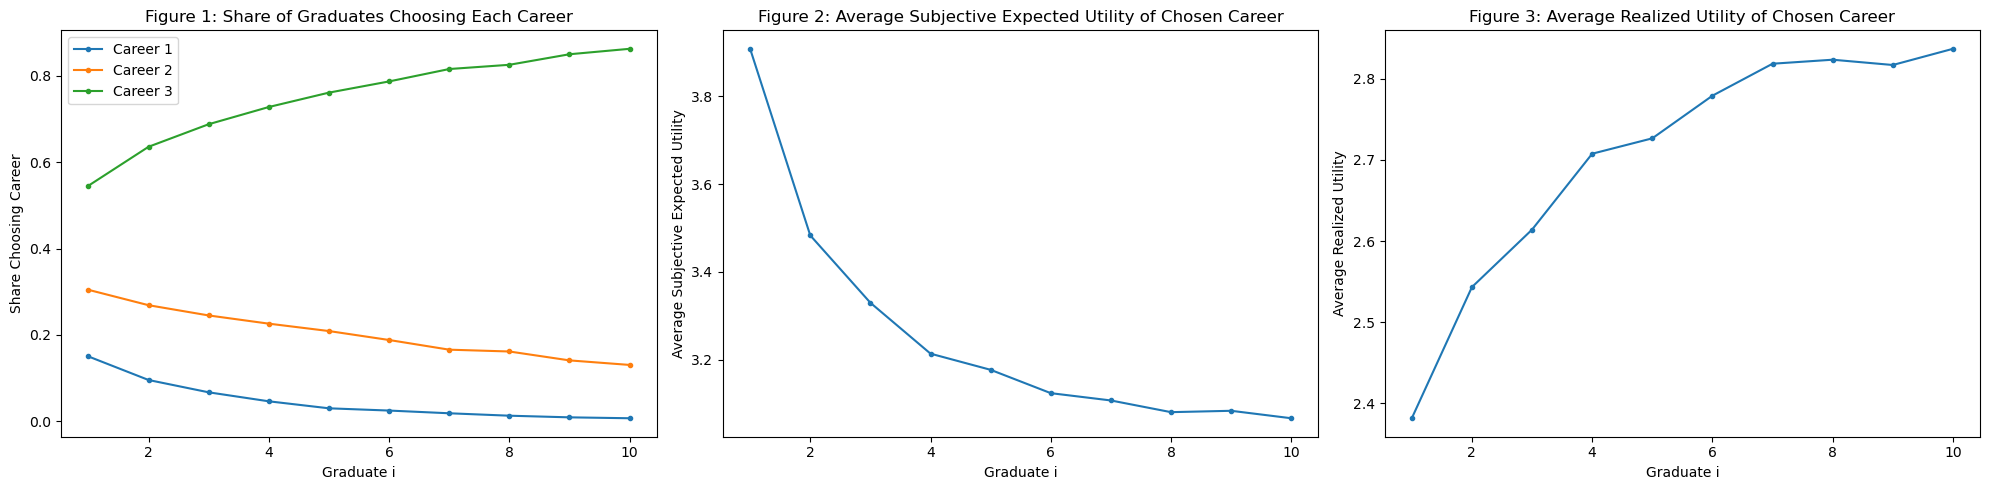

In [9]:
# We initialize parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000
par.sigma = 2
par.v = np.array([1, 2, 3])

# Step 1
career_choices = np.zeros((par.N, par.K), dtype=int)
prior_expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Step 2 and 3
for k in range(par.K):
    for i in range(par.N):
        Fi = i + 1
        epsilon_friends = np.random.normal(0, par.sigma, (par.J, Fi))
        prior_expectation = par.v[:, np.newaxis] + epsilon_friends
        prior_expected_utility = np.mean(prior_expectation, axis=1)

        epsilon_self = np.random.normal(0, par.sigma, par.J)
        realized_utility = par.v + epsilon_self

        best_career = np.argmax(prior_expected_utility)
        
        career_choices[i, k] = best_career
        prior_expected_utilities[i, k] = prior_expected_utility[best_career]
        realized_utilities[i, k] = realized_utility[best_career]

# Step 4
career_shares = np.zeros((par.N, par.J))
avg_prior_expected_utilities = np.zeros(par.N)
avg_realized_utilities = np.zeros(par.N)

for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(career_choices[i, :] == j)
    avg_prior_expected_utilities[i] = np.mean(prior_expected_utilities[i, :])
    avg_realized_utilities[i] = np.mean(realized_utilities[i, :])

# Step 5
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Figure 1: Share of graduates choosing each career
for j in range(par.J):
    axs[0].plot(range(1, par.N + 1), career_shares[:, j], marker='.', label=f'Career {j+1}')
axs[0].set_xlabel('Graduate i')
axs[0].set_ylabel('Share Choosing Career')
axs[0].set_title('Figure 1: Share of Graduates Choosing Each Career')
axs[0].legend()

# Figure 2: Average subjective expected utility
axs[1].plot(range(1, par.N + 1), avg_prior_expected_utilities, marker='.')
axs[1].set_xlabel('Graduate i')
axs[1].set_ylabel('Average Subjective Expected Utility')
axs[1].set_title('Figure 2: Average Subjective Expected Utility of Chosen Career')

# Figure 3: Average realized utility
axs[2].plot(range(1, par.N + 1), avg_realized_utilities, marker='.')
axs[2].set_xlabel('Graduate i')
axs[2].set_ylabel('Average Realized Utility')
axs[2].set_title('Figure 3: Average Realized Utility of Chosen Career')

plt.tight_layout()
plt.show()


In **figure 1** we see the share of graduates choosing each career path. We see that the more friends you have the higher is the probability that you are choosing career 3, while the probability of choosing career path 1 and 2 decreases the more friends you get. The intuition is that the realized value is highest for career 3, and the more friends you have the higher is the chance that you get to know the realized value for each career path.

In **figure 2** we see the average subjective *expected* utility for each candidate. We see that the more friends you have, the more the expected utility converges towards 3. The intuition is that each candidate picks the career with the highest expected utility. The less friends you have, the higher is the variance in $\epsilon$. The more friends you have, the more stable is the variance, explaining why it converges towards the realized values of each career path, where the highest is 3.

In **figure 3** we see the average *realized* utility for each candidate. We see that the more friends you got, the higher utility you will recieve. The intuition is that the more friends you got, the more precise you can choose the career path with the highest utility, whereas few friends will result in wrong career path choices more often because of the effect described in figure 2.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

1. **Initialize** storage arrays:
   - Store career choices, prior expected utilities, and realized utilities.

2. **Simulate** the first year:
   - Compute prior expected utility and realized utility for each individual.
   - Determine the best career choice based on prior expected utility.
   - Store the best career choice, prior expected utility, and realized utility.

3. **Simulate** career switching:
   - Compute new prior expected utility and realized utility for each individual.
   - Adjust utilities considering career switching costs.
   - Determine new best career choice and check for switches.
   - Store new career choices, utilities, and switching information.

4. **Calculate** statistics:
   - Compute career shares, average utilities, and switch rates.

5. **Plot** results:
   - Visualize share of graduates choosing each career.
   - Plot average subjective expected utility and realized utility.
   - Show share of graduates switching careers.


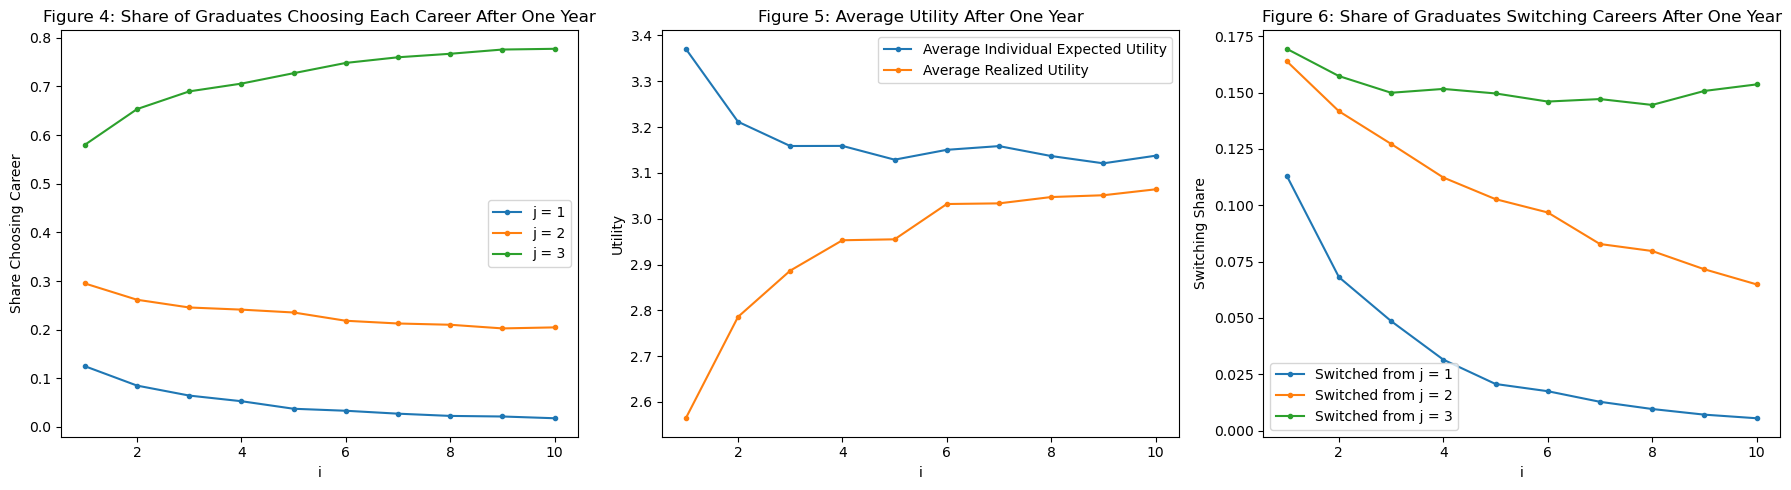

In [10]:
# We initialize par.c once again due to technical issues:
par.c = 1

# Step 1: Initialization
new_career_choices = np.zeros((par.N, par.K), dtype=int)
new_prior_expected_utilities = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switches = np.zeros((par.N, par.K), dtype=int)

# Step 2 and 3: Simulate career choices and utilities
for k in range(par.K):
    for i in range(par.N):
        Fi = i + 1
        epsilon_friends = np.random.normal(0, par.sigma, (par.J, Fi))
        prior_expectation = par.v[:, np.newaxis] + epsilon_friends
        prior_expected_utility = np.mean(prior_expectation, axis=1)
        
        previous_best_career = career_choices[i, k]
        previous_realized_utility = realized_utilities[i, k]
        
        # Calculate new prior and realized utilities with switching cost c
        new_prior_utility = np.where(
            np.arange(par.J) == previous_best_career,
            previous_realized_utility,
            prior_expected_utility - par.c
        )
        
        new_realized_utility = np.where(
            np.arange(par.J) == previous_best_career,
            previous_realized_utility,
            par.v + np.random.normal(0, par.sigma, par.J) - par.c
        )
        
        new_best_career = np.argmax(new_prior_utility)
        
        # Update choices and utilities
        new_career_choices[i, k] = new_best_career
        new_prior_expected_utilities[i, k] = new_prior_utility[new_best_career]
        new_realized_utilities[i, k] = new_realized_utility[new_best_career]
        switches[i, k] = (new_best_career != previous_best_career)

# Step 4: Calculate shares and averages
career_shares = np.zeros((par.N, par.J))
avg_prior_expected_utilities = np.zeros(par.N)
avg_realized_utilities = np.zeros(par.N)
switch_rates = np.zeros((par.N, par.J))

for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(new_career_choices[i, :] == j)
        switch_rates[i, j] = np.mean((switches[i, :] == 1) & (career_choices[i, :] == j))
    avg_prior_expected_utilities[i] = np.mean(new_prior_expected_utilities[i, :])
    avg_realized_utilities[i] = np.mean(new_realized_utilities[i, :])

# Step 5: Plot the figures
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Figure 4: Share of graduates choosing each career after switching
for j in range(par.J):
    axs[0].plot(range(1, par.N + 1), career_shares[:, j], marker='.', label=f'j = {j+1}')
axs[0].set_xlabel('i')
axs[0].set_ylabel('Share Choosing Career')
axs[0].set_title('Figure 4: Share of Graduates Choosing Each Career After One Year')
axs[0].legend()

# Figure 5: Average subjective expected utility after switching
axs[1].plot(range(1, par.N + 1), avg_prior_expected_utilities, marker='.', label='Average Individual Expected Utility')
axs[1].plot(range(1, par.N + 1), avg_realized_utilities, marker='.', label='Average Realized Utility')
axs[1].set_xlabel('i')
axs[1].set_ylabel('Utility')
axs[1].set_title('Figure 5: Average Utility After One Year')
axs[1].legend()

# Figure 6: Share of graduates switching careers after one year
for j in range(par.J):
    axs[2].plot(range(1, par.N + 1), switch_rates[:, j], marker='.', label=f'Switched from j = {j+1}')
axs[2].set_xlabel('i')
axs[2].set_ylabel('Switching Share')
axs[2].set_title('Figure 6: Share of Graduates Switching Careers After One Year')
axs[2].legend()

plt.tight_layout()
plt.show()


In the figures we see the same patterns in question 2. However, the average realized utility of a choosen career path is larger for each graduate in question 3 because you have an oppourtunity to choose a better career path.

This is also what we see in figure 2, where the expected utility of each candidate is closer to the realized utility, especially for the candiates with few friends. This is due to the opportunity of switching career paths, enabling them to expect a utility closer to the true highest value of 3.

In figure 6 we see the shares of graduates switching careers after one year. We would intuitively think that a higher J would imply a lower switching rate, since a higher J yields a higher utility and therefore lower incentive to switch to another job. However, this is not the case here. 


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

This exercise has been completed by the use of AI tools. Specifically, ChatGPT has partially helped with forming python-code and have assisted with guided text for each code snippet.

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [11]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

We do the following:
1. We define the function to compute the Euclidean distance:
   - Calculate the distance between two points $p_1$ and $p_2$.

2. Next, we compute the points $A$, $B$, $C$, and $D$:
   - Find points based on conditions relative to $y$ using the Euclidean distance function.

3. We then define the function to check if point $p$ is inside triangle $ABC$:
   - Use barycentric coordinates to determine if the point lies within the triangle.

4. Now we check if $y$ is inside triangles $ABC$ or $CDA$:
   - Determine if the barycentric coordinates indicate $y$ is within the triangles.

5. Finally, we plot the points and triangles:
   - Visualize the points $A$, $B$, $C$, $D$, and $y$.
   - Draw triangles $ABC$ and $CDA$ if the points are valid.
   - Print the appropriate equation based on the location of $y$.


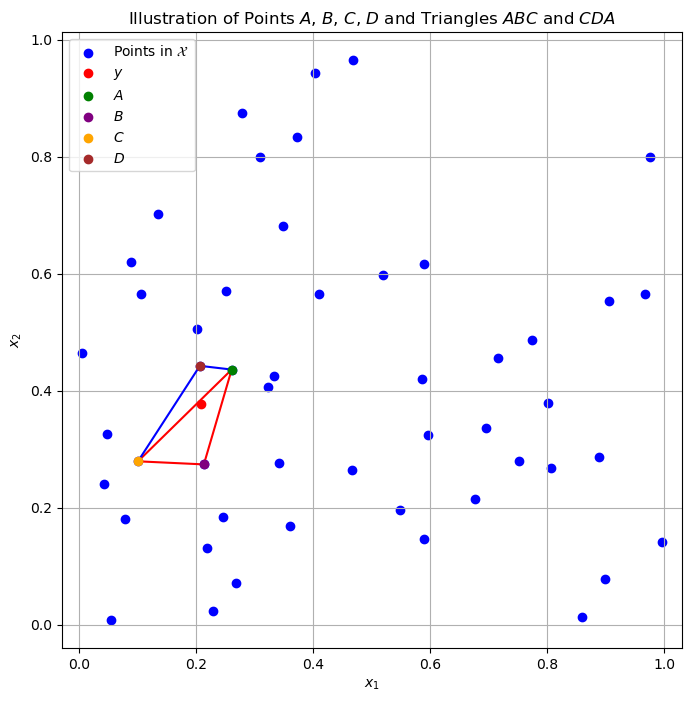

Inside ABC: $$r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$$


In [12]:
# Step 1
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Step 2
def find_point(X, y, condition):
    distances = [euclidean_distance(point, y) if condition(point, y) else np.inf for point in X]
    min_index = np.argmin(distances)
    return X[min_index] if distances[min_index] != np.inf else np.nan

A = find_point(X, y, lambda x, y: x[0] > y[0] and x[1] > y[1])
B = find_point(X, y, lambda x, y: x[0] > y[0] and x[1] < y[1])
C = find_point(X, y, lambda x, y: x[0] < y[0] and x[1] < y[1])
D = find_point(X, y, lambda x, y: x[0] < y[0] and x[1] > y[1])

# Step 3
def is_point_in_triangle(p, A, B, C):
    # Barycentric coordinates
    detT = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    l1 = ((B[1] - C[1]) * (p[0] - C[0]) + (C[0] - B[0]) * (p[1] - C[1])) / detT
    l2 = ((C[1] - A[1]) * (p[0] - C[0]) + (A[0] - C[0]) * (p[1] - C[1])) / detT
    l3 = 1 - l1 - l2
    return (l1 >= 0) and (l2 >= 0) and (l3 >= 0)

# Step 4
inside_ABC = is_point_in_triangle(y, A, B, C)
inside_CDA = is_point_in_triangle(y, C, D, A)

# Step 5
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='Points in $\mathcal{X}$', color='blue')
plt.scatter(y[0], y[1], label='$y$', color='red', zorder=5)
plt.scatter(A[0], A[1], label='$A$', color='green', zorder=5)
plt.scatter(B[0], B[1], label='$B$', color='purple', zorder=5)
plt.scatter(C[0], C[1], label='$C$', color='orange', zorder=5)
plt.scatter(D[0], D[1], label='$D$', color='brown', zorder=5)

# We draw triangles ABC and CDA if points are valid
if not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any() and not np.isnan(D).any():
    plt.plot([A[0], B[0]], [A[1], B[1]], color='red')
    plt.plot([B[0], C[0]], [B[1], C[1]], color='red')
    plt.plot([C[0], A[0]], [C[1], A[1]], color='red')
    plt.plot([C[0], D[0]], [C[1], D[1]], color='blue')
    plt.plot([D[0], A[0]], [D[1], A[1]], color='blue')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Illustration of Points $A$, $B$, $C$, $D$ and Triangles $ABC$ and $CDA$')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# We also print the right equation based on the location of y
if inside_ABC:
    print(r"Inside ABC: $$r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$$")
elif inside_CDA:
    print(r"Inside CDA: $$r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$$")
else:
    print("NaN")


**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

We do the following:
1. We **compute Barycentric Coordinates for** $y$ **with respect to** $\triangle ABC$:
   - Use the given formula for **r**$^{ABC}_1$, **r**$^{ABC}_2$, and **r**$^{ABC}_3$.
   - Check if **r**$^{ABC}_1$ $\in [0, 1]$, **r**$^{ABC}_2$ $\in [0, 1]$, and **r**$^{ABC}_3$ $\in [0, 1]$ to see if $y$ is inside $\triangle ABC$.

2. We **compute Barycentric Coordinates for** $y$ **with respect to** $\triangle CDA$:
   - Use the given formula for **r**$^{CDA}_1$, **r**$^{CDA}_2$, and **r**$^{CDA}_3$.
   - Check if **r**$^{CDA}_1$ $\in [0, 1]$, **r**$^{CDA}_2$ $\in [0, 1]$, and **r**$^{CDA}_3$ $\in [0, 1]$ to see if $y$ is inside $\triangle CDA$.

3. Finally, we **determine the location of** $y$:
   - If $y$ is inside $\triangle ABC$, return **r**$^{ABC}_1$ **f**$(A)$ + **r**$^{ABC}_2$ **f**$(B)$ + **r**$^{ABC}_3$ **f**$(C)$.
   - If $y$ is inside $\triangle CDA$, return **r**$^{CDA}_1$ **f**$(C)$ + **r**$^{CDA}_2$ **f**$(D)$ + **r**$^{CDA}_3$ **f**$(A)$.
   - If $y$ is not inside either triangle, return *NAN*.


In [13]:
# We start by defining the function to compute barycentric coordinates
def compute_barycentric_coords(p, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    l1 = ((B[1] - C[1]) * (p[0] - C[0]) + (C[0] - B[0]) * (p[1] - C[1])) / denom
    l2 = ((C[1] - A[1]) * (p[0] - C[0]) + (A[0] - C[0]) * (p[1] - C[1])) / denom
    l3 = 1 - l1 - l2
    return l1, l2, l3

# Next, we check if the barycentric coordinates indicate the point is inside the triangle
def is_inside_triangle(bary_coords):
    return all(0 <= coord <= 1 for coord in bary_coords)

# We define the function to compute the Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Then we compute the points A, B, C, D
def find_point(X, y, condition):
    distances = [euclidean_distance(point, y) if condition(point, y) else np.inf for point in X]
    min_index = np.argmin(distances)
    return X[min_index] if distances[min_index] != np.inf else np.nan

A = find_point(X, y, lambda x, y: x[0] > y[0] and x[1] > y[1])
B = find_point(X, y, lambda x, y: x[0] > y[0] and x[1] < y[1])
C = find_point(X, y, lambda x, y: x[0] < y[0] and x[1] < y[1])
D = find_point(X, y, lambda x, y: x[0] < y[0] and x[1] > y[1])

# We also compute the barycentric coordinates for y with respect to triangles ABC and CDA
bary_coords_ABC = compute_barycentric_coords(y, A, B, C)
bary_coords_CDA = compute_barycentric_coords(y, C, D, A)

# Here, we check if y is inside triangles ABC or CDA
inside_ABC = is_inside_triangle(bary_coords_ABC)
inside_CDA = is_inside_triangle(bary_coords_CDA)

# Finally, we print the barycentric coordinates with 3 decimals and determine which triangle contains y
print(f"Barycentric coordinates with respect to ABC: ({bary_coords_ABC[0]:.3f}, {bary_coords_ABC[1]:.3f}, {bary_coords_ABC[2]:.3f})")
print(f"Barycentric coordinates with respect to CDA: ({bary_coords_CDA[0]:.3f}, {bary_coords_CDA[1]:.3f}, {bary_coords_CDA[2]:.3f})")

if inside_ABC:
    print("Point y is inside triangle ABC.")
    print(r"Formula: r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)")
elif inside_CDA:
    print("Point y is inside triangle CDA.")
    print(r"Formula: r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)")
else:
    print("Point y is outside both triangles.")
    print("NaN")


Barycentric coordinates with respect to ABC: (0.629, 0.069, 0.302)
Barycentric coordinates with respect to CDA: (0.368, -0.134, 0.766)
Point y is inside triangle ABC.
Formula: r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [14]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

We do the following:
1. We **define** the necessary functions:
   - Compute the Euclidean distance between two points.
   - Find a point meeting a condition from a set of points.
   - Compute barycentric coordinates for a point with respect to a triangle.
   - Check if the barycentric coordinates indicate the point is inside the triangle.

2. We **generate** random points:
   - Create 50 random points within the unit square and a target point $y$.

3. We **compute** points $A$, $B$, $C$, and $D$:
   - Find points based on conditions relative to $y$ using the Euclidean distance function.

4. We **compute** barycentric coordinates for $y$ with respect to triangles $ABC$ and $CDA$:
   - Determine if $y$ is inside triangles $ABC$ or $CDA$ using the computed coordinates.

5. Lastly, we **approximate** and **evaluate** the function $f(y)$:
   - Use the barycentric coordinates to approximate $f(y)$ if $y$ is inside any triangle.
   - Compute the true value of $f(y)$.
   - Print the true and approximated values and their difference.


In [15]:
# Due to technical purposes we run same code as in previous task:
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def find_point(X, y, condition):
    distances = [euclidean_distance(point, y) if condition(point, y) else np.inf for point in X]
    min_index = np.argmin(distances)
    return X[min_index] if distances[min_index] != np.inf else np.nan

def compute_barycentric_coords(p, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    l1 = ((B[1] - C[1]) * (p[0] - C[0]) + (C[0] - B[0]) * (p[1] - C[1])) / denom
    l2 = ((C[1] - A[1]) * (p[0] - C[0]) + (A[0] - C[0]) * (p[1] - C[1])) / denom
    l3 = 1 - l1 - l2
    return l1, l2, l3

def is_inside_triangle(bary_coords):
    return all(0 <= coord <= 1 for coord in bary_coords)

A = find_point(X, y, lambda x, y: x[0] > y[0] and x[1] > y[1])
B = find_point(X, y, lambda x, y: x[0] > y[0] and x[1] < y[1])
C = find_point(X, y, lambda x, y: x[0] < y[0] and x[1] < y[1])
D = find_point(X, y, lambda x, y: x[0] < y[0] and x[1] > y[1])

bary_coords_ABC = compute_barycentric_coords(y, A, B, C)
bary_coords_CDA = compute_barycentric_coords(y, C, D, A)

inside_ABC = is_inside_triangle(bary_coords_ABC)
inside_CDA = is_inside_triangle(bary_coords_CDA)

# We define the function f
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])
print(y)

# We compute the approximation of f(y)
if inside_ABC:
    f_approx = bary_coords_ABC[0] * f(A) + bary_coords_ABC[1] * f(B) + bary_coords_ABC[2] * f(C)
elif inside_CDA:
    f_approx = bary_coords_CDA[0] * f(C) + bary_coords_CDA[1] * f(D) + bary_coords_CDA[2] * f(A)
else:
    f_approx = np.nan

# We also compute the true value of f(y)
f_true = f(y)

# Finally, we print the results
print(f"True value of f(y): {f_true:.3f}")
print(f"Approximated value of f(y): {f_approx:.3f}")
print(f"Difference between true and approximated value: {f_approx - f_true:.3f}")


[0.20901926 0.37774759]
True value of f(y): 0.079
Approximated value of f(y): 0.084
Difference between true and approximated value: 0.005


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [16]:
Y = [(0.2, 0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

We do the following
1. We **define** the functions:
   - Compute Euclidean distance.
   - Find a point meeting a condition.
   - Compute barycentric coordinates.
   - Check if a point is inside a triangle.

2. We **generate** random points and define $f$:
   - Create 50 random points in the unit square.
   - Define $f(x) = x[0] * x[1]$.

3. We **compute** each point in $Y$:
   - Compute points $A$, $B$, $C$, and $D$ for each $y$.
   - Compute barycentric coordinates for $y$ with respect to triangles $ABC$ and $CDA$.
   - Check if $y$ is inside $ABC$ or $CDA$.

4. Then we **approximate** and **evaluate** $f(y)$:
   - Compute $f$ approximation if $y$ is inside any triangle.
   - Compute the true value of $f(y)$.

5. Finally, we **print** the results:
   - Display the true and approximated values of $f(y)$ and their difference.


In [17]:
# We define the function to compute the Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# We compute points A, B, C, D
def find_point(X, y, condition):
    distances = [euclidean_distance(point, y) if condition(point, y) else np.inf for point in X]
    min_index = np.argmin(distances)
    return X[min_index] if distances[min_index] != np.inf else np.nan

# A function is created to compute barycentric coordinates
def compute_barycentric_coords(p, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    l1 = ((B[1] - C[1]) * (p[0] - C[0]) + (C[0] - B[0]) * (p[1] - C[1])) / denom
    l2 = ((C[1] - A[1]) * (p[0] - C[0]) + (A[0] - C[0]) * (p[1] - C[1])) / denom
    l3 = 1 - l1 - l2
    return l1, l2, l3

# W define the function f
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

# We process each point in Y
results = []
for y in Y:
    y = np.array(y)
    
    A = find_point(X, y, lambda x, y: x[0] > y[0] and x[1] > y[1])
    B = find_point(X, y, lambda x, y: x[0] > y[0] and x[1] < y[1])
    C = find_point(X, y, lambda x, y: x[0] < y[0] and x[1] < y[1])
    D = find_point(X, y, lambda x, y: x[0] < y[0] and x[1] > y[1])
    
    if np.isnan(A).any() or np.isnan(B).any() or np.isnan(C).any() or np.isnan(D).any():
        f_approx = np.nan
    else:

        bary_coords_ABC = compute_barycentric_coords(y, A, B, C)
        bary_coords_CDA = compute_barycentric_coords(y, C, D, A)
        
        inside_ABC = is_inside_triangle(bary_coords_ABC)
        inside_CDA = is_inside_triangle(bary_coords_CDA)
        
        if inside_ABC:
            f_approx = bary_coords_ABC[0] * f(A) + bary_coords_ABC[1] * f(B) + bary_coords_ABC[2] * f(C)
        elif inside_CDA:
            f_approx = bary_coords_CDA[0] * f(C) + bary_coords_CDA[1] * f(D) + bary_coords_CDA[2] * f(A)
        else:
            f_approx = np.nan

    # We compute the true value of f(y)
    f_true = f(y)
    
    # And then we store the results by appending the list we've created earlier
    results.append((y, f_true, f_approx))

# Finally, we print the results with decimals shortened to 3 places
for y, f_true, f_approx in results:
    print(f"Point y: {y}")
    print(f"True value of f(y): {f_true:.3f}")
    print(f"Approximated value of f(y): {f_approx:.3f}")
    print(f"Difference between true and approximated value: {f_approx - f_true:.3f}")
    print("\n")


Point y: [0.2 0.2]
True value of f(y): 0.040
Approximated value of f(y): 0.040
Difference between true and approximated value: 0.000


Point y: [0.8 0.2]
True value of f(y): 0.160
Approximated value of f(y): 0.159
Difference between true and approximated value: -0.001


Point y: [0.8 0.8]
True value of f(y): 0.640
Approximated value of f(y): nan
Difference between true and approximated value: nan


Point y: [0.8 0.2]
True value of f(y): 0.160
Approximated value of f(y): 0.159
Difference between true and approximated value: -0.001


Point y: [0.5 0.5]
True value of f(y): 0.250
Approximated value of f(y): 0.251
Difference between true and approximated value: 0.001


